In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

(x_train32,y_train),(x_test32,y_test32) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test32 = to_categorical(y_test32)

In [11]:
x_train16 = [0]*x_train32.shape[0]
x_train8 = [0]*x_train32.shape[0]
x_test16 = [0]*x_test32.shape[0]
x_test8 = [0]*x_test32.shape[0]

for i in range(0,x_train32.shape[0]):
  x_train16[i] = cv2.resize(x_train32[i],(16,16))
  x_train16[i] = cv2.resize(x_train16[i],(32,32))
  x_train8[i] = cv2.resize(x_train32[i],(8,8))
  x_train8[i] = cv2.resize(x_train8[i],(32,32))

for i in range(0,x_test32.shape[0]):
  x_test16[i] = cv2.resize(x_test32[i],(16,16))
  x_test16[i] = cv2.resize(x_test16[i],(32,32))
  x_test8[i] = cv2.resize(x_test32[i],(8,8))
  x_test8[i] = cv2.resize(x_test8[i],(32,32))

x_train16 = np.array(x_train16)
x_train8 = np.array(x_train8)
x_test16 = np.array(x_test16)
x_test8 = np.array(x_test8)

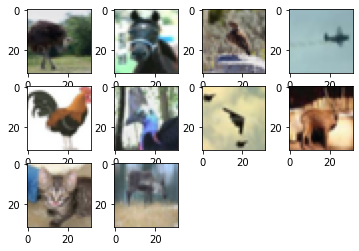

In [12]:
import random
random_index = random.sample(range(1,x_train32.shape[0]),10)

for i in range(10):
	plt.subplot(3,4,i+1)
	plt.imshow(x_train32[random_index[i]])
plt.show()

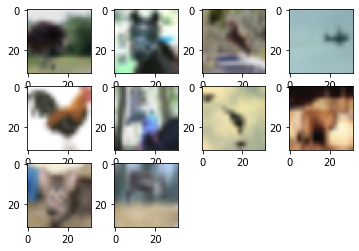

In [13]:
for i in range(10):
	plt.subplot(3,4,i+1)
	plt.imshow(x_train16[random_index[i]])
plt.show()

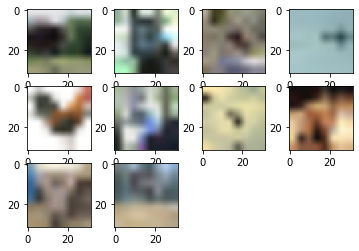

In [14]:
for i in range(10):
	plt.subplot(3,4,i+1)
	plt.imshow(x_train8[random_index[i]])
plt.show()

In [15]:
x_train32 = x_train32.astype('float32')
x_train16 = x_train16.astype('float32')
x_train8 = x_train8.astype('float32')

x_test32 = x_test32.astype('float32')
x_test16 = x_test16.astype('float32')
x_test8 = x_test8.astype('float32')

x_train32 = x_train32/255
x_train16 = x_train16/255
x_train8 = x_train8/255

x_test32 = x_test32/255
x_test16 = x_test16/255
x_test8 = x_test8/255

x_train32, x_valid32, y_train32, y_valid32 = train_test_split(x_train32, y_train, test_size=0.2, random_state=4)
x_train16, x_valid16, y_train16, y_valid16 = train_test_split(x_train16, y_train, test_size=0.2, random_state=4)
x_train8, x_valid8, y_train8, y_valid8 = train_test_split(x_train8, y_train, test_size=0.2, random_state=4)

In [16]:
from keras import datasets, layers, models
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score

class cnn:
  def __init__(self):
    self.model = models.Sequential()

    self.model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    self.model.add(layers.Conv2D(32, (3, 3), activation='relu',))
    self.model.add(layers.Conv2D(32, (3, 3), activation='relu',))
    self.model.add(layers.MaxPooling2D((2, 2)))
    self.model.add(layers.Dropout(.25))

    self.model.add(layers.Conv2D(64, (3, 3), activation='relu',))
    self.model.add(layers.Conv2D(64, (3, 3), activation='relu',))
    self.model.add(layers.Conv2D(64, (3, 3), activation='relu',))
    self.model.add(layers.MaxPooling2D((2, 2)))
    self.model.add(layers.Dropout(.25))

    self.model.add(layers.Flatten())
    self.model.add(layers.Dense(512, activation="relu",kernel_initializer='he_uniform'))
    self.model.add(layers.Dropout(.5))

    self.model.add(layers.Dense(10,activation="softmax"))

    self.model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

    self.model.summary()

  def fit(self , x_train , y_train , x_valid , y_valid ):
    self.history = self.model.fit(x_train, y_train, epochs=40 , batch_size=32, validation_data=(x_valid, y_valid))

  def accuracy_plot(self):
    fig = plt.figure()
    plt.plot(self.history.history['accuracy'],'r')
    plt.plot(self.history.history['val_accuracy'],'b')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.grid()

  def loss_plot(self):
    fig = plt.figure()
    plt.plot(self.history.history['loss'],'r')
    plt.plot(self.history.history['val_loss'],'b')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.grid()
  
  def report(self , x_test , y_test ):
    Y_pred = self.model.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    Y_test = np.argmax(y_test, axis=1)

    test_loss,test_accuracy = self.model.evaluate(x_test,y_test)
    print('test loss = %f' % test_loss)
    print('test accuracy = %f' % test_accuracy)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(Y_test, y_pred, average='macro')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(Y_test, y_pred, average='macro')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Y_test, y_pred, average='macro')
    print('F1 score: %f' % f1)

PART 1 : TOTV

In [17]:
model = cnn()
model.fit(x_train32, y_train32, x_valid32, y_valid32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                        

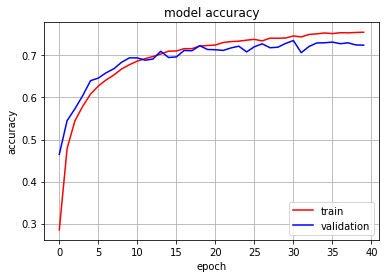

In [18]:
model.accuracy_plot()

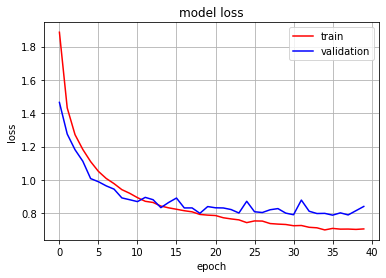

In [19]:
model.loss_plot()

In [20]:
model.report( x_test32 , y_test32 )

313/313 [==============================] - 1s 4ms/step - loss: 0.8431 - accuracy: 0.7224
test loss = 0.843062
test accuracy = 0.722400
Accuracy: 0.722400
Precision: 0.728394
Recall: 0.722400
F1 score: 0.719111


In [21]:
model.report( x_test16 , y_test32 )

313/313 [==============================] - 1s 3ms/step - loss: 2.0264 - accuracy: 0.3786
test loss = 2.026375
test accuracy = 0.378600
Accuracy: 0.378600
Precision: 0.541996
Recall: 0.378600
F1 score: 0.369880


In [22]:
model.report( x_test8 , y_test32 )

313/313 [==============================] - 1s 4ms/step - loss: 2.6892 - accuracy: 0.2252
test loss = 2.689169
test accuracy = 0.225200
Accuracy: 0.225200
Precision: 0.384229
Recall: 0.225200
F1 score: 0.179374


PART 2 : TVTV

In [23]:
model2 = cnn()
model2.fit(x_train32, y_train32, x_valid32, y_valid32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                      

In [24]:
model2.report( x_test32 , y_test32 )

313/313 [==============================] - 1s 3ms/step - loss: 0.8209 - accuracy: 0.7349
test loss = 0.820891
test accuracy = 0.734900
Accuracy: 0.734900
Precision: 0.740647
Recall: 0.734900
F1 score: 0.734097


In [25]:
model3 = cnn()
model3.fit(x_train16, y_train16, x_valid16, y_valid16)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                      

In [26]:
model3.report( x_test16 , y_test32 )

313/313 [==============================] - 1s 4ms/step - loss: 1.0299 - accuracy: 0.6447
test loss = 1.029921
test accuracy = 0.644700
Accuracy: 0.644700
Precision: 0.646886
Recall: 0.644700
F1 score: 0.642353


In [27]:
model4 = cnn()
model4.fit(x_train8, y_train8, x_valid8, y_valid8)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                      

In [28]:
model4.report( x_test8 , y_test32 )

313/313 [==============================] - 1s 3ms/step - loss: 1.3113 - accuracy: 0.5318
test loss = 1.311263
test accuracy = 0.531800
Accuracy: 0.531800
Precision: 0.540302
Recall: 0.531800
F1 score: 0.531979
